# Imports

In [1]:
import numpy as np
np.random.seed(1)
import random
random.seed(1)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from importances import importances

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
if not os.path.exists('results'):
    os.makedirs('results')

# Decision Tree 

In [5]:
clf = DecisionTreeRegressor(random_state=1)
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [6]:
train = pd.read_csv('../feature_engineering/train.gz')

In [7]:
train[train.columns[:-1]].head()

,Year,Month,Day,Hour,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2016,1,1,0,2633.0,2667.0,1271.0,5422.0,0.0,311.0,417.0
1,2016,1,1,1,2614.0,2341.0,1197.0,5423.0,0.0,310.0,471.0
2,2016,1,1,2,2281.0,1929.0,1192.0,5422.0,0.0,308.0,469.0
3,2016,1,1,3,2204.0,1910.0,1194.0,5422.0,0.0,310.0,437.0
4,2016,1,1,4,2380.0,1999.0,1210.0,5422.0,0.0,310.0,413.0


In [8]:
train[train.columns[-1]].head()

0    15.55904
1    14.43644
2    13.24040
3    13.49220
4    12.67385
Name: Price, dtype: float64

In [9]:
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values

In [10]:
test = pd.read_csv('../feature_engineering/test.gz')

In [11]:
test[test.columns[:-1]].head()

,Year,Month,Day,Hour,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2018,6,1,0,1909.0,3414.0,2337.0,5350.0,0.0,270.0,634.0
1,2018,6,1,1,1821.0,3432.0,2100.0,5335.0,0.0,269.0,561.0
2,2018,6,1,2,1665.0,3368.0,1971.0,5352.0,0.0,268.0,577.0
3,2018,6,1,3,1728.0,3426.0,2013.0,5358.0,0.0,268.0,451.0
4,2018,6,1,4,1830.0,3386.0,2042.0,5354.0,0.0,266.0,396.0


In [12]:
test[test.columns[-1]].head()

0    25.84154
1    22.78535
2    20.74440
3    20.22108
4    20.54554
Name: Price, dtype: float64

In [13]:
X_test = test[test.columns[:-1]].values
y_test = test[test.columns[-1]].values

## Grid Search

In [14]:
cv = KFold(n_splits=3, shuffle=True, random_state=1)
cv

KFold(n_splits=3, random_state=1, shuffle=True)

In [15]:
params = {
    "max_depth": [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features": ["sqrt", "log2", None],
    "max_leaf_nodes": [2, 5, 10, 100, None],
    "min_impurity_decrease": [0, 0.001, 0.01, 0.1],
}

In [16]:
grid = EvolutionaryAlgorithmSearchCV(
    estimator=clf, 
    params=params, 
    cv=cv, 
    scoring='neg_mean_squared_error',
    n_jobs=4, 
    population_size=10,
    gene_mutation_prob=0.10,
    gene_crossover_prob=0.5,
    tournament_size=3,
    generations_number=15,
    verbose=1,
)
grid

EvolutionaryAlgorithmSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
               error_score='raise',
               estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'),
               fit_params={}, gene_crossover_prob=0.5,
               gene_mutation_prob=0.1, gene_type=None,
               generations_number=15, iid=True, n_jobs=4,
               params={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['sqrt', 'log2', None], 'max_leaf_nodes': [2, 5, 10, 100, None], 'min_impurity_decrease': [0, 0.001, 0.01, 0.1]},
               population_size=10, refit=True,
            

In [17]:
_ = grid.fit(X_train, y_train)

Types [1, 1, 1, 1, 1, 1] and maxint [11, 8, 8, 2, 4, 3] detected
--- Evolve in 58320 possible combinations ---
gen	nevals	avg    	min     	max     	std    
0  	10    	-120.95	-255.078	-49.3154	74.8169
1  	8     	-75.6898	-255.078	-49.3154	59.967 
2  	4     	-52.9864	-60.0355	-49.3154	4.10764
3  	8     	-50.2686	-56.3498	-49.3154	2.07614
4  	8     	-49.4496	-50.4714	-49.3154	0.345096
5  	5     	-49.334 	-49.5013	-49.3154	0.0557653
6  	7     	-52.8838	-84.9994	-49.3154	10.7052  
7  	5     	-49.3154	-49.3154	-49.3154	0        
8  	3     	-54.6428	-102.59 	-49.3154	15.9822  
9  	6     	-49.3154	-49.3154	-49.3154	0        
10 	5     	-64.505 	-201.212	-49.3154	45.5689  
11 	10    	-50.0932	-57.0933	-49.3154	2.33337  
12 	1     	-49.3154	-49.3154	-49.3154	0        
13 	6     	-49.3154	-49.3154	-49.3154	0        
14 	4     	-49.3154	-49.3154	-49.3154	0        
15 	2     	-49.3538	-49.6997	-49.3154	0.115305 
Best individual is: {'max_depth': 60, 'min_samples_split': 8, 'min_samples_leaf': 2, '

In [18]:
best = pd.Series(grid.best_params_)
best.to_csv('results/dt-params.csv')
best

max_depth                 60.00
max_features                NaN
max_leaf_nodes           100.00
min_impurity_decrease      0.01
min_samples_leaf           2.00
min_samples_split          8.00
dtype: float64

In [19]:
results = grid.cv_results_
df = pd.DataFrame(results)
df.to_csv('results/dt-grid.csv')
df

,index,max_test_score,mean_test_score,min_test_score,nan_test_score?,param_index,params,std_test_score
0,11,-60.771569,-60.771569,-60.771569,False,0,"{'max_depth': 20, 'min_samples_split': 3, 'min...",0.0
1,12,-55.216228,-55.216228,-55.216228,False,0,"{'max_depth': 80, 'min_samples_split': 5, 'min...",0.0
2,13,-49.315393,-49.315393,-49.315393,False,0,"{'max_depth': 60, 'min_samples_split': 2, 'min...",0.0
3,14,-60.706759,-60.706759,-60.706759,False,0,"{'max_depth': None, 'min_samples_split': 8, 'm...",0.0
4,15,-60.035456,-60.035456,-60.035456,False,0,"{'max_depth': 70, 'min_samples_split': 8, 'min...",0.0
5,16,-49.315393,-49.315393,-49.315393,False,0,"{'max_depth': 60, 'min_samples_split': 8, 'min...",0.0
6,17,-60.706759,-60.706759,-60.706759,False,0,"{'max_depth': None, 'min_samples_split': 3, 'm...",0.0
7,18,-55.216228,-55.216228,-55.216228,False,0,"{'max_depth': 20, 'min_samples_split': 2, 'min...",0.0
8,21,-49.315393,-49.315393,-49.315393,False,0,"{'max_depth': 60, 'min_samples_split': 2, 'min...",0.0
9,22,-50.471436,-50.471436,-50.471436,False,0,"{'max_depth': 60, 'min_samples_split': 8, 'min...",0.0


# Testing

In [20]:
clf = DecisionTreeRegressor(**grid.best_params_)
clf

DecisionTreeRegressor(criterion='mse', max_depth=60, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.01,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=60, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.01,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
help(importances)

Help on function importances in module importances:

importances(model, dataset, threshold:float=-0.001, figsize:tuple=(7, 7))
    Plot the importance rankings for a given classifier
    
    Args:
        model: the classifier providing a `feature_importances_` attribute
        dataset: the dataset the classifier models
        threshold: the minimum importance ranking to be included on the plot
        figsize: the size of the figure to render as a tuple (W, H)
    
    Returns:
        a matplotlib figure



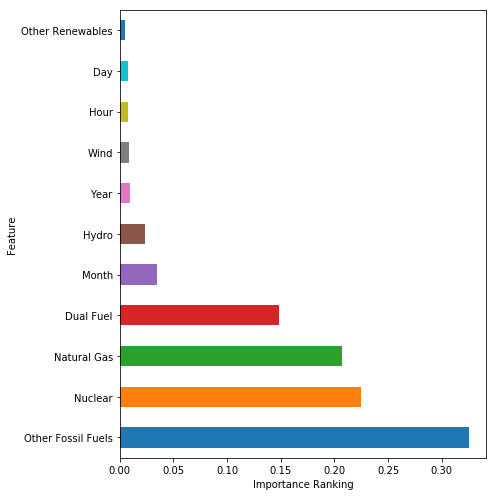

In [23]:
_ = importances(clf, train[train.columns[:-1]])
plt.savefig('results/dt-importances.pdf')
plt.savefig('results/dt-importances.svg')

## Training Accuracy

In [24]:
train_pred = clf.predict(X_train)

In [25]:
train_err = mean_squared_error(y_train, train_pred)
train_err

32.08682083703436

In [26]:
train_df = pd.DataFrame([y_train, train_pred], index=['Truth', 'Predictions']).T

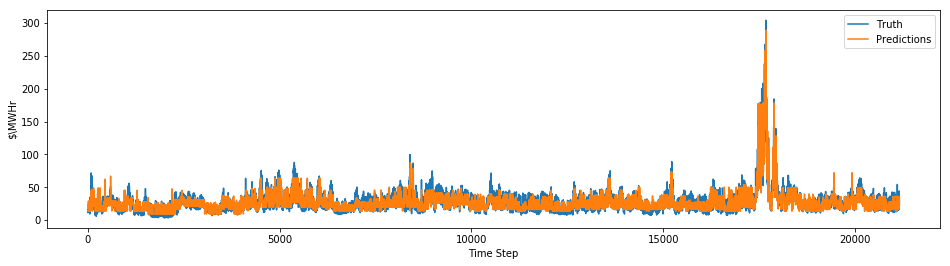

In [27]:
ax = train_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/dt-train.pdf')
plt.savefig('results/dt-train.svg')

## Testing Accuracy

In [28]:
test_pred = clf.predict(X_test)

In [29]:
test_err = mean_squared_error(y_test, test_pred)
test_err

60.4593636768421

In [30]:
test_df = pd.DataFrame([y_test, test_pred], index=['Truth', 'Predictions']).T

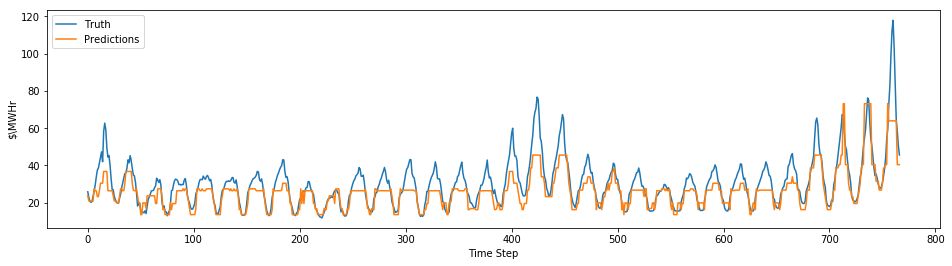

In [31]:
ax = test_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/dt-test.pdf')
plt.savefig('results/dt-test.svg')

## Results

In [32]:
results = pd.Series([train_err, test_err], index=['Train', 'Test'])
results

Train    32.086821
Test     60.459364
dtype: float64

In [33]:
results.to_csv('results/dt-mse.csv')